In [ ]:
import tensorflow as tf


In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Create Data to View and Fit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Creating the features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0])
X

array([-7., -4., -1.,  2.,  5.,  8., 11.])

In [ ]:
y = np.array([12.0,9.0,6.0,3.0,0.0,-3.0,-6.0])
y

array([12.,  9.,  6.,  3.,  0., -3., -6.])

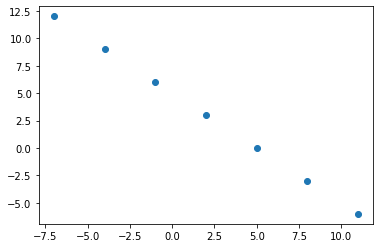

In [ ]:
plt.scatter(X,y);

In [ ]:
## Turn our numpy array into tensors
X = tf.constant(X)
y = tf.constant(y)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

In [ ]:
input_shape

TensorShape([])

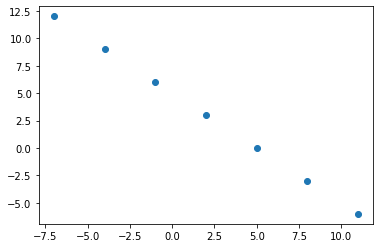

In [ ]:
plt.scatter(X,y)

## Steps in modelling with tensorflow
1. **Creating a model** - Defining the input and output layers, as well as the hidden layer of a deep learning model
2. **Compiling a model** - We need to define a loss function and the optimizer.(optimizer tells our model how to improve the patterns its learning)
3. **Fitting the model**-let the model find patterns between X and y

In [ ]:
tf.random.set_seed(42)

In [ ]:
# Create a model
model = tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape=[1])])

In [ ]:
# Compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

In [ ]:
# Fit the model to our data
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 8.3403 - mae: 8.3403
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 8.1042 - mae: 8.1042
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 7.8680 - mae: 7.8680
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 7.6319 - mae: 7.6319
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 7.3958 - mae: 7.3958


In [ ]:
y_pred = model.predict([17.0])

In [ ]:
y_pred

array([[5.5695896]], dtype=float32)

## Improving a model

1. **Creating a model** - Here we can add more layers, increase the number of hidden layers, within each hidden layer we can change the activation function.
2. **Compiling a model** - Here we might change the optimization function, or perhaps the learning rate of optimization function.
3. **Fitting a model** - Change the number of epochs or give the model more examples to learn from.


In [ ]:
## Creating a larger model
model = tf.keras.Sequential([
                              tf.keras.layers.Dense(100,input_shape=[1],activation="relu"),
                             tf.keras.layers.Dense(100,input_shape=[1],activation="relu"),
                             tf.keras.layers.Dense(100,input_shape=[1],activation="relu"),
                             tf.keras.layers.Dense(100,input_shape=[1],activation="relu"),
                             tf.keras.layers.Dense(100,input_shape=[1],activation="relu"),
                             tf.keras.layers.Dense(100,input_shape=[1],activation="relu"),
                             tf.keras.layers.Dense(1,input_shape=[1])])
model.compile(loss=tf.keras.losses.mae,optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['mae'])
earlystopping = tf.keras.callbacks.EarlyStopping(monitor ="mae", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
model.fit(X,y,epochs=1000,callbacks=[earlystopping])

Epoch 1/1000
1/1 [==============================] - 1s 713ms/step - loss: 5.5879 - mae: 5.5879
Epoch 2/1000
1/1 [==============================] - 0s 14ms/step - loss: 5.5043 - mae: 5.5043
Epoch 3/1000
1/1 [==============================] - 0s 14ms/step - loss: 5.4318 - mae: 5.4318
Epoch 4/1000
1/1 [==============================] - 0s 14ms/step - loss: 5.3546 - mae: 5.3546
Epoch 5/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.2784 - mae: 5.2784
Epoch 6/1000
1/1 [==============================] - 0s 14ms/step - loss: 5.1863 - mae: 5.1863
Epoch 7/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.0779 - mae: 5.0779
Epoch 8/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.9476 - mae: 4.9476
Epoch 9/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.7954 - mae: 4.7954
Epoch 10/1000
1/1 [==============================] - 0s 18ms/step - loss: 4.6173 - mae: 4.6173
Epoch 11/1000
1/1 [==============================] - 0s 14

In [ ]:
model.predict([17.0])

array([[-8.179444]], dtype=float32)

## Evaluate a model

In [ ]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

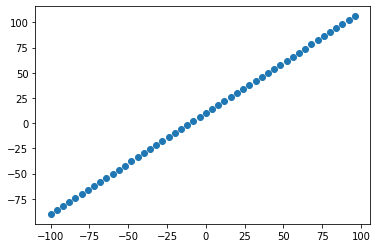

In [ ]:
plt.scatter(X,y)

In [ ]:
train_index = int(X.shape[0]*0.8)
test_index = int(X.shape[0]*0.2)

In [ ]:
X_train,X_test,y_train,y_test=X[:train_index],X[train_index:],y[:train_index],y[train_index:]

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

(TensorShape([40]), TensorShape([10]), TensorShape([40]), TensorShape([10]))

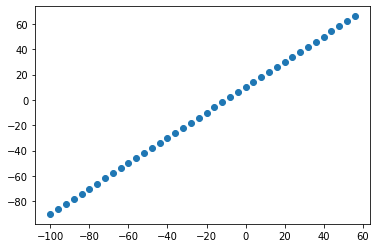

In [ ]:
plt.scatter(X_train,y_train)

In [ ]:
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(100,input_shape=[1],activation="relu",name="Input_layer"),
                            tf.keras.layers.Dense(100,input_shape=[1],activation="relu",name="Hidden_layer"),
                             tf.keras.layers.Dense(1,input_shape=[1],name="output_layer"), 
                             ])
model.compile(loss=tf.keras.losses.mae,optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])
model.fit(X_train,y_train,epochs=100,validation_data=[X_test,y_test])

Epoch 1/100
2/2 [==============================] - 1s 301ms/step - loss: 45.2750 - mae: 45.2750 - val_loss: 40.7373 - val_mae: 40.7373
Epoch 2/100
2/2 [==============================] - 0s 22ms/step - loss: 23.9738 - mae: 23.9738 - val_loss: 7.0789 - val_mae: 7.0789
Epoch 3/100
2/2 [==============================] - 0s 22ms/step - loss: 8.7160 - mae: 8.7160 - val_loss: 36.1464 - val_mae: 36.1464
Epoch 4/100
2/2 [==============================] - 0s 21ms/step - loss: 11.3405 - mae: 11.3405 - val_loss: 17.4074 - val_mae: 17.4074
Epoch 5/100
2/2 [==============================] - 0s 22ms/step - loss: 8.1762 - mae: 8.1762 - val_loss: 3.2471 - val_mae: 3.2471
Epoch 6/100
2/2 [==============================] - 0s 22ms/step - loss: 7.2746 - mae: 7.2746 - val_loss: 5.0469 - val_mae: 5.0469
Epoch 7/100
2/2 [==============================] - 0s 41ms/step - loss: 9.0837 - mae: 9.0837 - val_loss: 4.9244 - val_mae: 4.9244
Epoch 8/100
2/2 [==============================] - 0s 22ms/step - loss: 5.690

In [ ]:
y_preds = model.predict(X_test)
y_preds,y_test

(array([[ 79.749825],
        [ 84.38664 ],
        [ 89.02263 ],
        [ 93.65732 ],
        [ 98.292   ],
        [102.92669 ],
        [107.56138 ],
        [112.196075],
        [116.83078 ],
        [121.46555 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 100)               200       
                                                                 
 Hidden_layer (Dense)        (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model

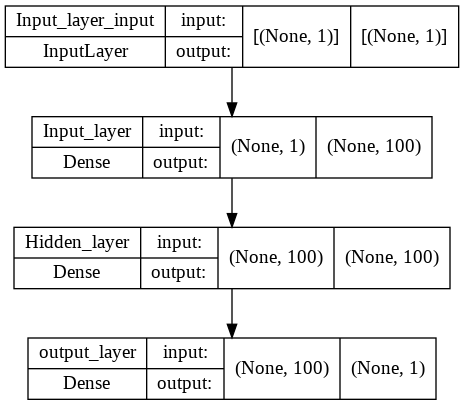

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([[ 79.749825],
       [ 84.38664 ],
       [ 89.02263 ],
       [ 93.65732 ],
       [ 98.292   ],
       [102.92669 ],
       [107.56138 ],
       [112.196075],
       [116.83078 ],
       [121.46555 ]], dtype=float32)

In [ ]:
#plotting function
def plot_preds(X_train, y_train, X_test, y_test, y_preds):
  plt.figure(figsize=(10,7))
  plt.scatter(X_train,y_train,c="blue",label="training data")
  plt.scatter(X_test,y_test,c="green",label="test data")
  plt.scatter(X_test,y_preds,c="red",label="Predictions")
  plt.legend()

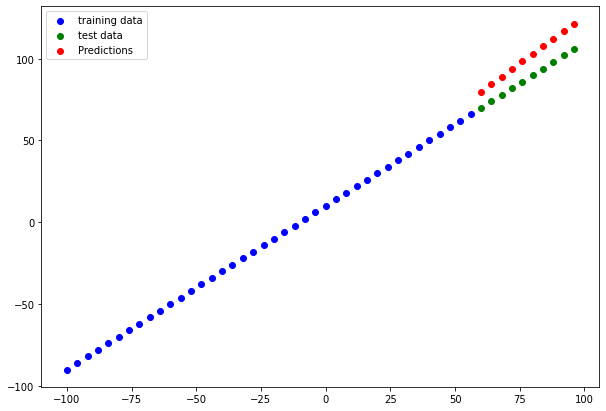

In [ ]:
plot_preds(X_train,y_train,X_test,y_test,y_preds)

## Evaluating our model with regression Metrics

In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 20ms/step - loss: 12.6089 - mae: 12.6089


[12.608888626098633, 12.608888626098633]

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.reduce_mean(tf.metrics.mean_absolute_error(tf.reshape(y_test,shape=(10,1)),tf.constant(y_preds)))

<tf.Tensor: shape=(), dtype=float32, numpy=12.608889>

In [ ]:
tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=12.608889>

In [ ]:
tf.metrics.mean_squared_error(y_test,tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=162.31003>

In [ ]:
## Calculating by programming
n = 10
sum = 0
for i in range(n):
  sum+= abs(y_test[i] - y_preds[i])
error = sum/n 
error 

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([12.1])>

In [ ]:
def evaluate_metrics(y_true,y_preds):
  mae, mse = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_preds)),tf.metrics.mean_squared_error(y_test,tf.squeeze(y_preds))
  return mae,mse

In [ ]:
evaluate_metrics(y_test,y_preds)

(<tf.Tensor: shape=(), dtype=float32, numpy=12.608889>,
 <tf.Tensor: shape=(), dtype=float32, numpy=162.31003>)

## Experimenting With Our Model
When model tunning keep this things in mind:

1. There is no perfect formula to select number of layers and number of nodes

2. More number of layers does not actually means better model.

3. When Selecting number of nodes start with lowest even number and then increase by doubling or tripling the initial number. like if 1st layer has 2 node then prolly use next layer with 4 node . This is not exactly a rule but a tip that i learnt while working with models.

4. Under stand the activation function . it Really makes difference when you know the activation function.

5. After layer tuning move to compilation tuning . Learn about losses and optimizers because if you know what they are your model tuning will be fast.

6. Create a baseline model and use it to compare your tuned model

Let's do 3 modelling experiments
1. `Model-1` - 1 layer, train for 100 epochs
2. `Model-2` - 2 layers, train for 100 epochs
3. `Model-3` - 3 layers , train for 100 epochs
4. `Model-4` - 3 layers, changed the learning rate to 0.01, trained for 100 epochs
5. `Model-5` - 3 layers same as model 4, trained for 500 epochs

**Build Model 1**

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape=[1])])
model_1.compile(loss='mae',optimizer = tf.keras.optimizers.SGD(),metrics=["mae"])
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

In [ ]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1_preds = model_1.predict(X_test) 
mae_1 , mse_1 = evaluate_metrics(y_test,model_1_preds)

**Build Model 2**

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
                                tf.keras.layers.Dense(100,input_shape=[1],activation="relu"),
                                tf.keras.layers.Dense(1)])
model_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 41.2123 - mae: 41.2123
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 40.1715 - mae: 40.1715
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 39.1841 - mae: 39.1841
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 38.1776 - mae: 38.1776
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 37.1992 - mae: 37.1992
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 36.2251 - mae: 36.2251
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 35.2339 - mae: 35.2339
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 34.2045 - mae: 34.2045
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 33.2354 - mae: 33.2354
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 32.2696 - mae: 32.2696
Epoch 11/100
2/2 [==============================] - 0s 6ms

In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               200       
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


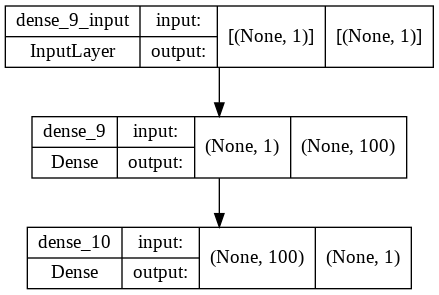

In [ ]:
plot_model(model_2,show_shapes=True)

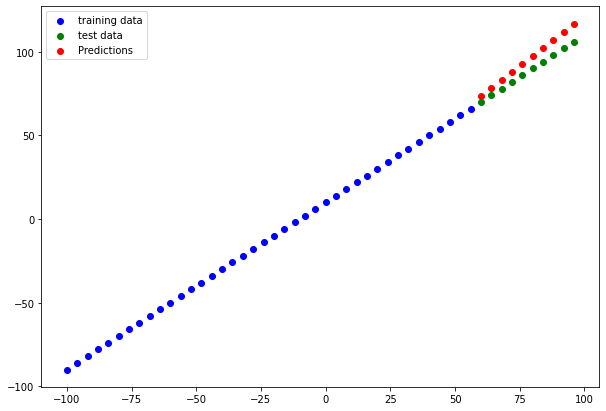

In [ ]:
y_preds = model_2.predict(X_test)
mae_2,mse_2 = evaluate_metrics(y_test,y_preds)
plot_preds(X_train,y_train,X_test,y_test,y_preds)

**Build Model 3**

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
                                tf.keras.layers.Dense(100,input_shape=[1],activation='relu'),
                                tf.keras.layers.Dense(100,input_shape=[1],activation='relu'),
                               tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])
model_3.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 41.6971 - mae: 41.6971
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 38.0372 - mae: 38.0372
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 34.6713 - mae: 34.6713
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 31.4066 - mae: 31.4066
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 28.3796 - mae: 28.3796
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 25.5006 - mae: 25.5006
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 22.6733 - mae: 22.6733
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 19.8073 - mae: 19.8073
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 17.1294 - mae: 17.1294
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 14.5737 - mae: 14.5737
Epoch 11/100
2/2 [==============================] - 0s 7ms/

In [ ]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               200       
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


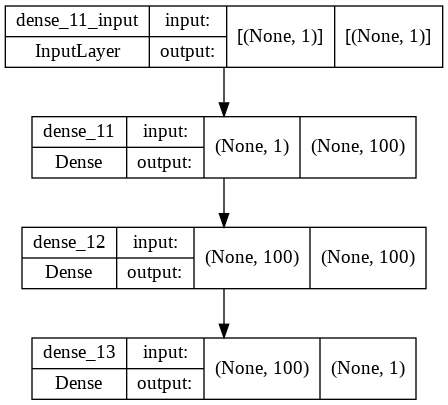

In [ ]:
plot_model(model_3,show_shapes=True)

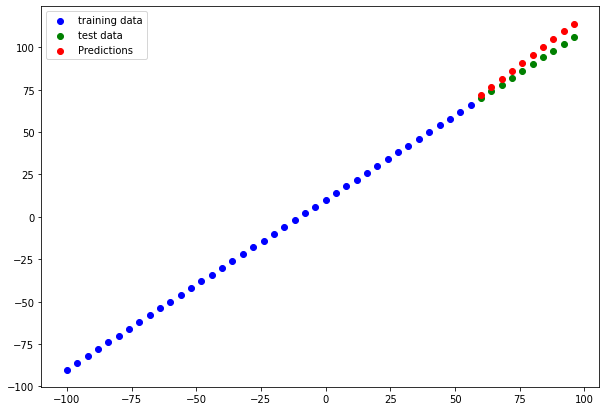

In [ ]:
y_preds = model_3.predict(X_test)
mae_3,mse_3 = evaluate_metrics(y_test,y_preds)
plot_preds(X_train,y_train,X_test,y_test,y_preds)

**Build Model 4**

In [ ]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
                                tf.keras.layers.Dense(100,input_shape=[1],activation='relu'),
                                tf.keras.layers.Dense(100,input_shape=[1],activation='relu'),
                               tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])
model_4.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 39.1866 - mae: 39.1866
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 12.6233 - mae: 12.6233
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 7.8631 - mae: 7.8631
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 8.7138 - mae: 8.7138
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 6.7156 - mae: 6.7156
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 6.1763 - mae: 6.1763
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 5.3610 - mae: 5.3610
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 6.2242 - mae: 6.2242
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 5.7453 - mae: 5.7453
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 6.8323 - mae: 6.8323
Epoch 11/100
2/2 [==============================] - 0s 12ms/step - loss: 5.

In [ ]:
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               200       
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


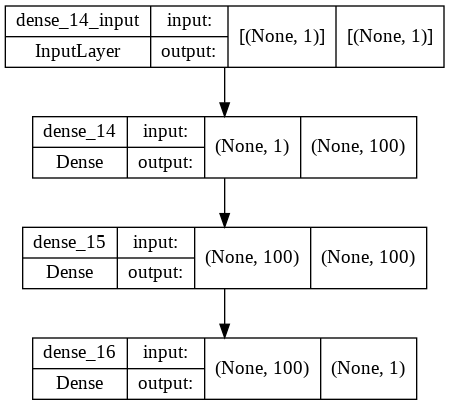

In [ ]:
plot_model(model_4,show_shapes=True)

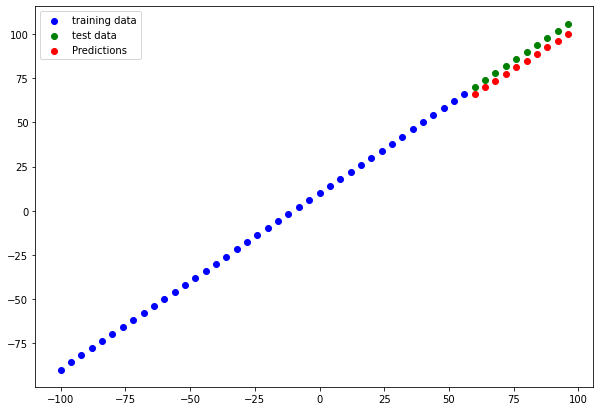

In [ ]:
y_preds = model_4.predict(X_test)
mae_4,mse_4 = evaluate_metrics(y_test,y_preds)
plot_preds(X_train,y_train,X_test,y_test,y_preds)

**Build Model 5**

In [ ]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
                                tf.keras.layers.Dense(100,input_shape=[1],activation='relu'),
                                tf.keras.layers.Dense(100,input_shape=[1],activation='relu'),
                               tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])
model_5.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 39.1866 - mae: 39.1866
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 12.6233 - mae: 12.6233
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 7.8631 - mae: 7.8631
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 8.7138 - mae: 8.7138
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 6.7156 - mae: 6.7156
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 6.1763 - mae: 6.1763
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 5.3610 - mae: 5.3610
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 6.2242 - mae: 6.2242
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 5.7453 - mae: 5.7453
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 6.8323 - mae: 6.8323
Epoch 11/500
2/2 [==============================] - 0s 6ms/step - loss: 5.2

In [ ]:
model_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               200       
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


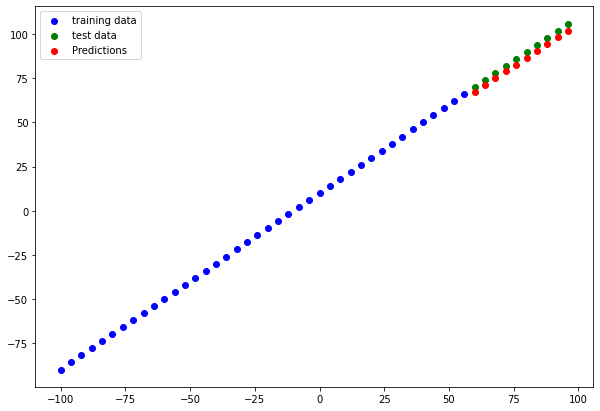

In [ ]:
y_preds = model_5.predict(X_test)
mae_5,mse_5 = evaluate_metrics(y_test,y_preds)
plot_preds(X_train,y_train,X_test,y_test,y_preds)

## Let's compare our models results in a dataframe

In [ ]:
import pandas as pd

models = [["model_1",mae_1.numpy(),mse_1.numpy()],
          ["model_2",mae_2.numpy(),mse_2.numpy()],
          ["model_3",mae_3.numpy(),mse_3.numpy()],
          ["model_4",mae_4.numpy(),mse_4.numpy()],
          ["model_5",mae_5.numpy(),mse_5.numpy()]]

In [ ]:
all_results = pd.DataFrame(models,columns=["Model","MAE","MSE"])

In [ ]:
all_results

,Model,MAE,MSE
0,model_1,18.745327,353.573395
1,model_2,7.182925,57.071766
2,model_3,4.993410,28.552881
3,model_4,4.978035,25.212864
4,model_5,3.304018,11.126681


## Saving a model

In [ ]:
model_5.save("best_model")

In [ ]:
model_5.save("best_model_5.h5")

## Loading a saved model

In [ ]:
loaded_model = tf.keras.models.load_model("best_model_5.h5")

In [ ]:
loaded_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               200       
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_5_preds = model_5.predict(X_test)
loaded_model_preds = loaded_model.predict(X_test)
model_5_preds == loaded_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])